In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
# create mapping for weekday/weekend
week_end_day = {}
week_end_day['Monday'] = 'Weekday'
week_end_day['Tuesday'] = 'Weekday'
week_end_day['Wednesday'] = 'Weekday'
week_end_day['Thursday'] = 'Weekday'
week_end_day['Friday'] = 'Weekday'
week_end_day['Saturday'] = 'Weekend'
week_end_day['Sunday'] = 'Weekend'

In [16]:
# read in cleaned traffic data
df = pd.read_csv('../data/average_station_traffic.csv')
del df['Unnamed: 0']

In [17]:
# map weekday/weekend, create short time
df['Week_Day'] = df["Day"].map(week_end_day)
df['Short_Time'] = df.apply(
    lambda x: x['Time_Range'][:2] + ' to ' + x['Time_Range'][9:11], axis=1)

In [18]:
# group by weekend/weekday
df_totals = df.groupby(["Week_Day", "Short_Time"]).agg(
    {'Total_Traffic': 'sum'}).reset_index()

# combine names for axis
df_totals['Output_Range'] = df_totals.apply(
    lambda x: x['Week_Day'] + "  " + x['Short_Time'], axis=1)

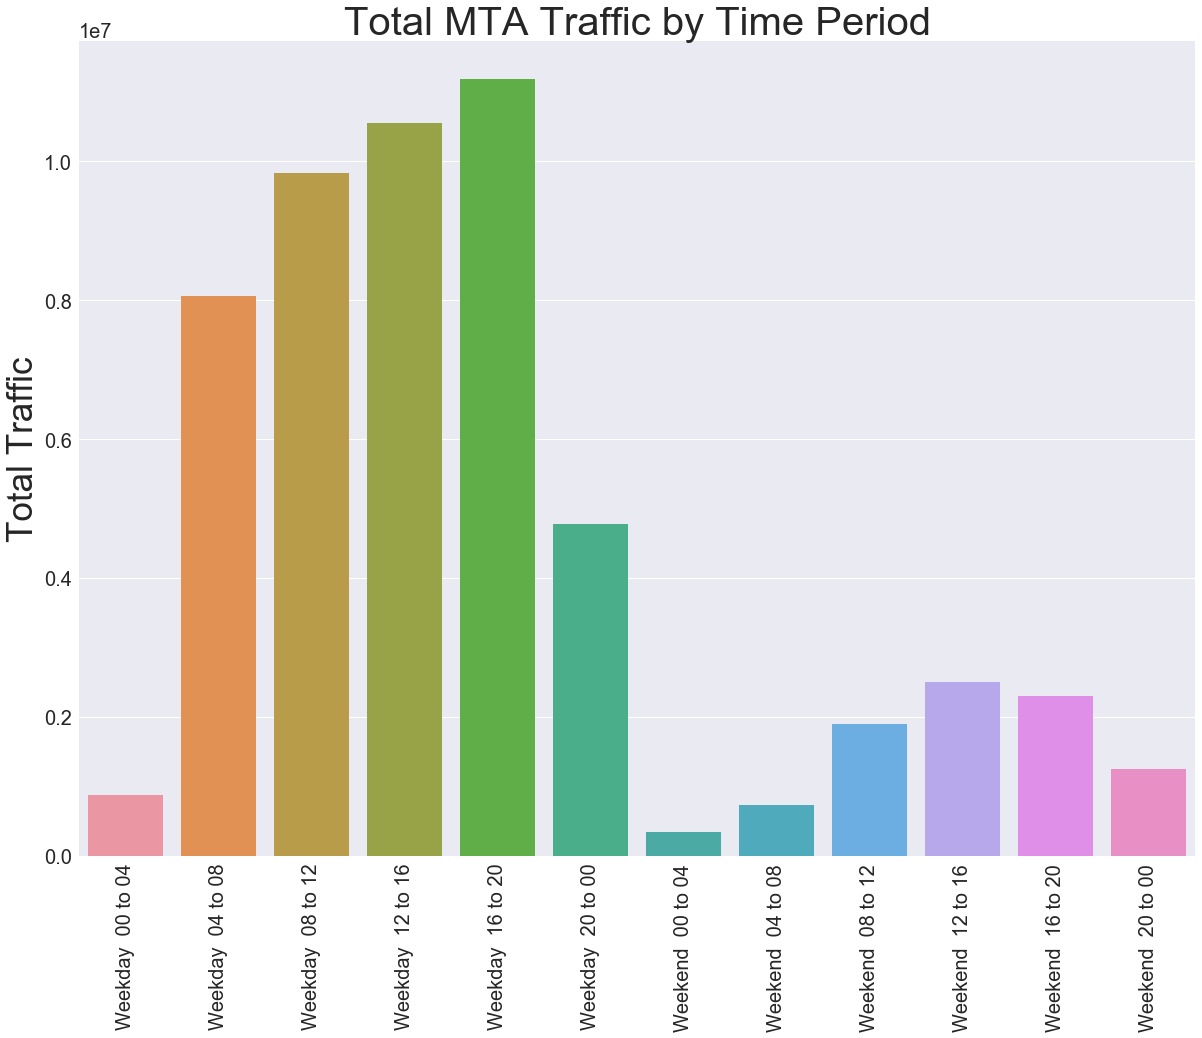

In [19]:
# plot it!
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.set(font_scale=2)

fig = sns.barplot(x=df_totals['Output_Range'], y=df_totals['Total_Traffic'])
fig.set_title("Total MTA Traffic by Time Period", fontsize=40)
ax.set_xticklabels(df_totals['Output_Range'], rotation=90)
ax.set_xlabel('', fontsize=35)
ax.set_ylabel('Total Traffic', fontsize=35)